# Data Cleaning/Feature Engineering

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('/Users/lincolnwhiting/Git Portfolio/Datasets/spotify_tracks.csv')
df.head()

,id,name,genre,artists,album,popularity,duration_ms,explicit
0,7kr3xZk4yb3YSZ4VFtg2Qt,Acoustic,acoustic,Billy Raffoul,1975,58,172199,False
1,1kJygfS4eoVziBBI93MSYp,Acoustic,acoustic,Billy Raffoul,A Few More Hours at YYZ,57,172202,False
2,6lynns69p4zTCRxmmiSY1x,Here Comes the Sun - Acoustic,acoustic,"Molly Hocking, Bailey Rushlow",Here Comes the Sun (Acoustic),42,144786,False
3,1RC9slv335IfLce5vt9KTW,Acoustic #3,acoustic,The Goo Goo Dolls,Dizzy up the Girl,46,116573,False
4,5o9L8xBuILoVjLECSBi7Vo,My Love Mine All Mine - Acoustic Instrumental,acoustic,"Guus Dielissen, Casper Esmann",My Love Mine All Mine (Acoustic Instrumental),33,133922,False


In [3]:
df.drop('id', axis=1, inplace=True) #dropping ID (not needed for analysis)
df.head()

,name,genre,artists,album,popularity,duration_ms,explicit
0,Acoustic,acoustic,Billy Raffoul,1975,58,172199,False
1,Acoustic,acoustic,Billy Raffoul,A Few More Hours at YYZ,57,172202,False
2,Here Comes the Sun - Acoustic,acoustic,"Molly Hocking, Bailey Rushlow",Here Comes the Sun (Acoustic),42,144786,False
3,Acoustic #3,acoustic,The Goo Goo Dolls,Dizzy up the Girl,46,116573,False
4,My Love Mine All Mine - Acoustic Instrumental,acoustic,"Guus Dielissen, Casper Esmann",My Love Mine All Mine (Acoustic Instrumental),33,133922,False


In [4]:
df.isnull().sum() #checking for missing values 

name           0
genre          0
artists        0
album          0
popularity     0
duration_ms    0
explicit       0
dtype: int64

In [5]:
df.info() #view data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6300 entries, 0 to 6299
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   name         6300 non-null   object
 1   genre        6300 non-null   object
 2   artists      6300 non-null   object
 3   album        6300 non-null   object
 4   popularity   6300 non-null   int64 
 5   duration_ms  6300 non-null   int64 
 6   explicit     6300 non-null   bool  
dtypes: bool(1), int64(2), object(4)
memory usage: 301.6+ KB


In [6]:
df.describe() 

,popularity,duration_ms
count,6300.000000,6.300000e+03
mean,30.754762,2.028477e+05
std,19.948991,1.210299e+05
min,0.000000,3.006000e+04
25%,16.000000,1.476870e+05
50%,29.000000,1.916070e+05
75%,45.000000,2.369625e+05
max,90.000000,3.601658e+06


In [7]:
df.shape

(6300, 7)

# Exploratory Data Analysis (EDA)

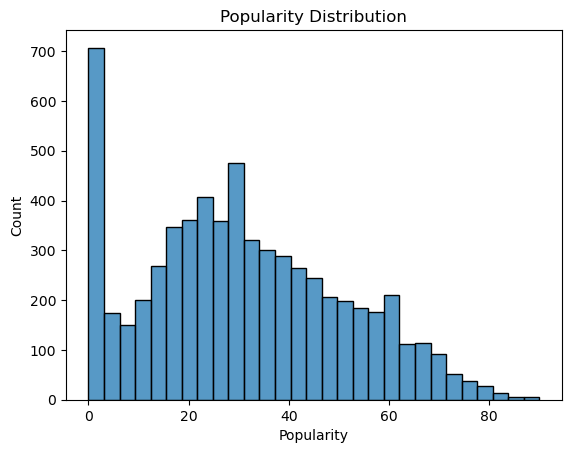

In [8]:
sns.histplot(df['popularity']) #view the distribution of popularity metric via a histragram 
plt.title('Popularity Distribution')
plt.xlabel('Popularity')
plt.ylabel('Count')
plt.show()

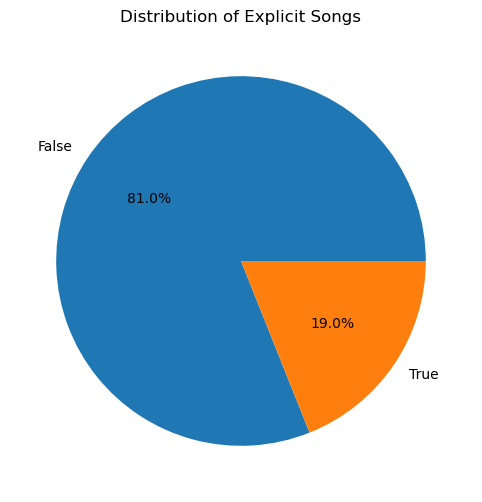

In [9]:
plt.figure(figsize=(10, 6)) #Create pie chart for explicit song distribution
plt.pie(df['explicit'].value_counts(), labels=['False', 'True'], autopct='%1.1f%%')
plt.title('Distribution of Explicit Songs')
plt.show()

Explicit songs are more popular on average (popularity of 33.6 vs 30.1)

In [10]:
df['artists'] = df['artists'].str.split(',').str[0] #select only primary (first listed) artists in any rows with multiple artists

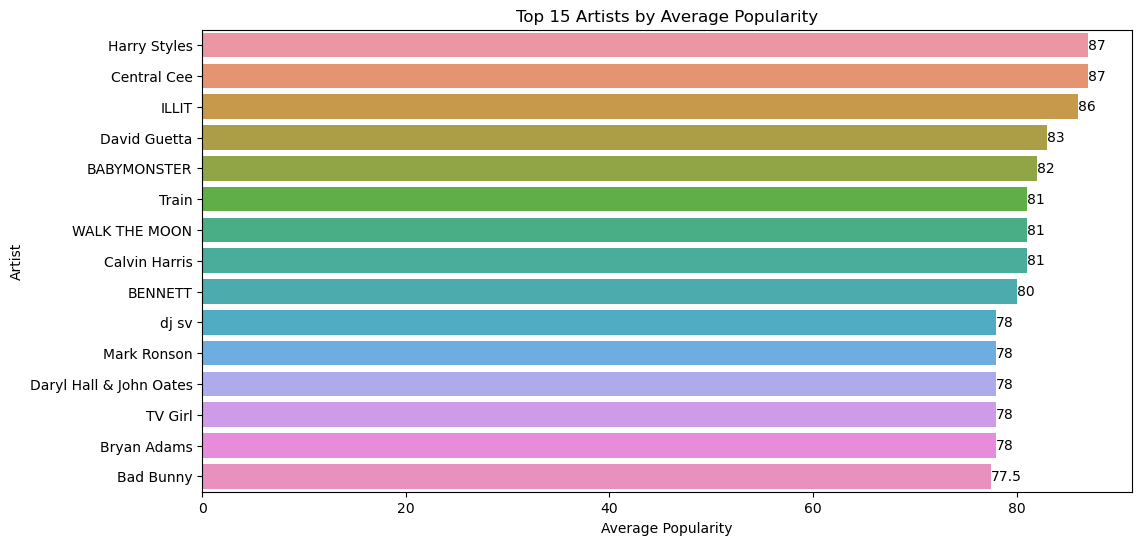

In [11]:
popular_artists = df.groupby('artists')['popularity'].mean().sort_values(ascending=False) #group top artists by popularity

plt.figure(figsize=(12, 6))
sns.barplot(x=popular_artists.values[:15], y=popular_artists.index[:15])
plt.bar_label(plt.gca().containers[0])
plt.title('Top 15 Artists by Average Popularity')
plt.xlabel('Average Popularity')
plt.ylabel('Artist')
plt.show()

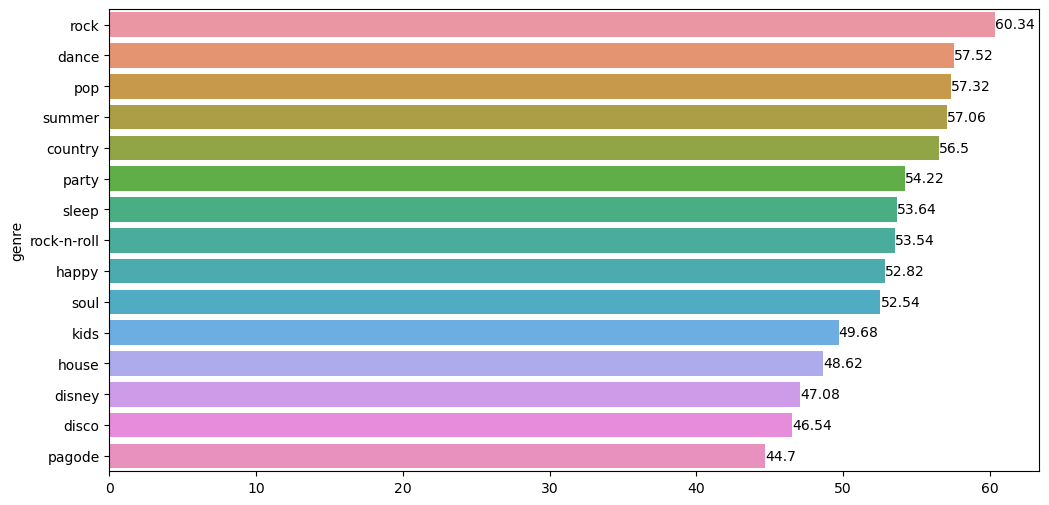

In [12]:
genre_popularity = df.groupby('genre')['popularity'].mean().sort_values(ascending=False) #group top genres by popularity

plt.figure(figsize=(12, 6)) #create a bar graph showing top 15 generes 
sns.barplot(x=genre_popularity.values[:15], y=genre_popularity.index[:15])
plt.bar_label(plt.gca().containers[0])
plt.show()

explicit
False    30.073639
True     33.667504
Name: popularity, dtype: float64


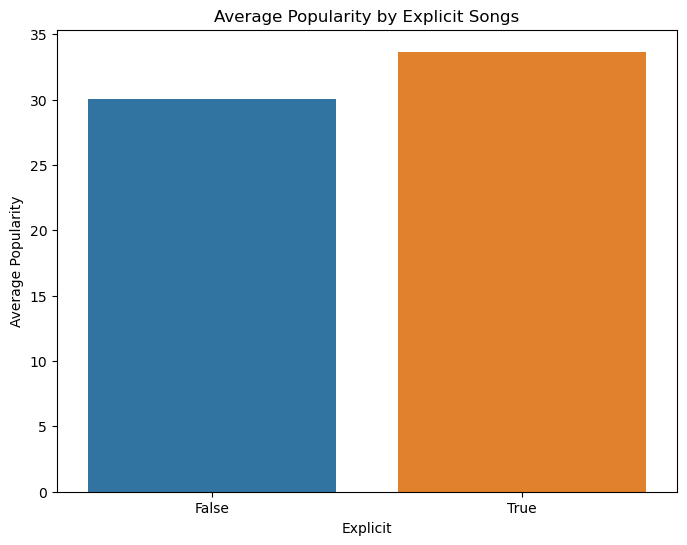

In [13]:
explicit_populatiry = df.groupby('explicit')['popularity'].mean()
print(explicit_populatiry)

plt.figure(figsize=(8, 6))
sns.barplot(x=explicit_populatiry.index, y=explicit_populatiry.values)
plt.title('Average Popularity by Explicit Songs')
plt.xlabel('Explicit')
plt.ylabel('Average Popularity')
plt.show()

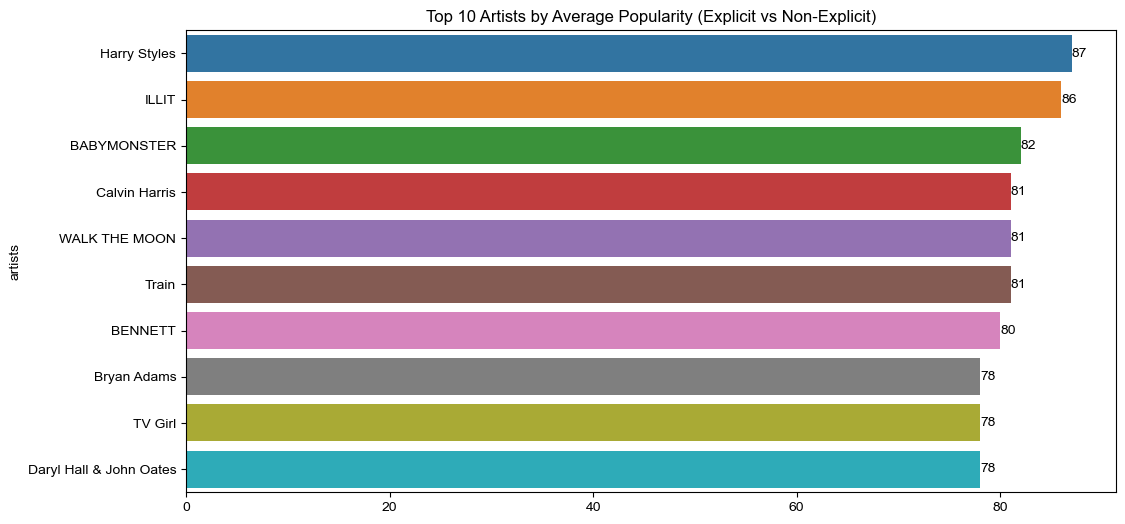

In [14]:
top_explicit_artists = df[df['explicit'] == True].groupby('artists')['popularity'].mean().sort_values(ascending=False) #most popular explicit artists
top_non_explicit_artists = df[df['explicit'] == False].groupby('artists')['popularity'].mean().sort_values(ascending=False) #most popular non-explicit artists

plt.figure(figsize=(12, 6)) #plot bar graph with top 10 of both explicit & non-explicit artists 
sns.barplot(x=top_explicit_artists.values[:10], y=top_explicit_artists.index[:10], label='Explicit')
sns.barplot(x=top_non_explicit_artists.values[:10], y=top_non_explicit_artists.index[:10], label='Non-Explicit')
plt.bar_label(plt.gca().containers[1])
sns.set_theme(style="whitegrid")
plt.title('Top 10 Artists by Average Popularity (Explicit vs Non-Explicit)')
plt.show()

In [15]:

print (f'Top explicit artists have an average popularity of {round(top_explicit_artists.values[:10].mean(),2)}, while non-explicit artists have an average of {round(top_non_explicit_artists.values[:10].mean(),2)}')

Top explicit artists have an average popularity of 78.65, while non-explicit artists have an average of 81.2


**While explicit artists are more popular on average, among the top 10 most popular artists in each category we see the opposite.**

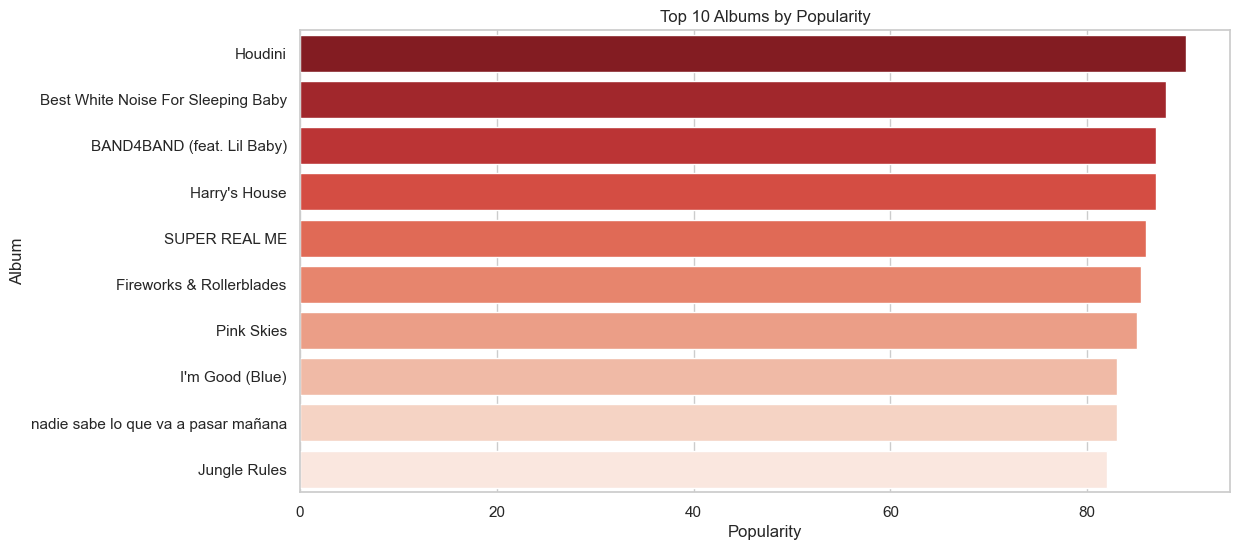

In [16]:
top_albums = df.groupby('album')['popularity'].mean().sort_values(ascending=False) #create bar chart for top 10 albums


plt.figure(figsize=(12, 6))
sns.barplot(x=top_albums.values[:10], y= top_albums.index[:10],
            palette="Reds_r")
plt.title("Top 10 Albums by Popularity")
plt.xlabel('Popularity')
plt.ylabel('Album')
plt.show()


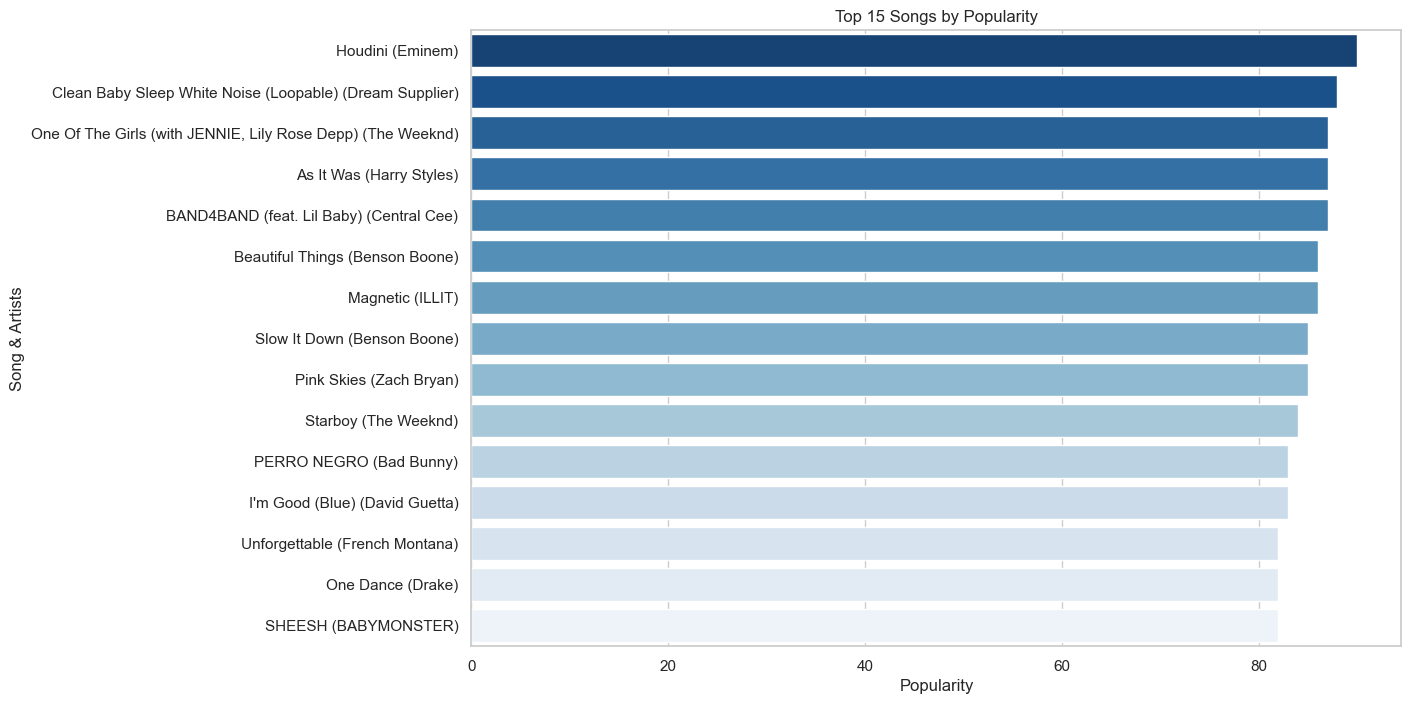

In [17]:
top_songs = df.groupby('name', as_index=False).agg({'popularity': 'mean', 'artists': 'first'}) #create df for top_songs to output top song's and the assosiated artist
top_songs = top_songs.sort_values(by='popularity', ascending=False).head(15) #sort by popularity, showing top 15 
top_songs['y_label'] = top_songs['name'] + " (" + top_songs['artists'] + ")" #concat the name and artist


plt.figure(figsize=(12,8))
chart = sns.barplot(
    x=top_songs['popularity'],
    y=top_songs['y_label'],
    palette="Blues_r"
)

plt.xlabel('Popularity')
plt.ylabel('Song & Artists')
plt.title('Top 15 Songs by Popularity')
plt.show()

# Create Calculated fields and format for Tableau

In [18]:
df["seconds"] = df['duration_ms'].apply(lambda x: x / 1000).round(2)
df["minutes"] = df['duration_ms'].apply(lambda x: x / 60000).round(2) #convert ms to sec for interpretability


In [19]:
df.drop('duration_ms', axis=1, inplace=True)

In [20]:
df.head()

,name,genre,artists,album,popularity,explicit,seconds,minutes
0,Acoustic,acoustic,Billy Raffoul,1975,58,False,172.20,2.87
1,Acoustic,acoustic,Billy Raffoul,A Few More Hours at YYZ,57,False,172.20,2.87
2,Here Comes the Sun - Acoustic,acoustic,Molly Hocking,Here Comes the Sun (Acoustic),42,False,144.79,2.41
3,Acoustic #3,acoustic,The Goo Goo Dolls,Dizzy up the Girl,46,False,116.57,1.94
4,My Love Mine All Mine - Acoustic Instrumental,acoustic,Guus Dielissen,My Love Mine All Mine (Acoustic Instrumental),33,False,133.92,2.23


In [21]:
df['genre'] = df['genre'].str.capitalize() #Capitalize Genre column entries

In [22]:
df.columns = df.columns.str.capitalize() #Capitalize Column headers

In [23]:
df.head()

,Name,Genre,Artists,Album,Popularity,Explicit,Seconds,Minutes
0,Acoustic,Acoustic,Billy Raffoul,1975,58,False,172.20,2.87
1,Acoustic,Acoustic,Billy Raffoul,A Few More Hours at YYZ,57,False,172.20,2.87
2,Here Comes the Sun - Acoustic,Acoustic,Molly Hocking,Here Comes the Sun (Acoustic),42,False,144.79,2.41
3,Acoustic #3,Acoustic,The Goo Goo Dolls,Dizzy up the Girl,46,False,116.57,1.94
4,My Love Mine All Mine - Acoustic Instrumental,Acoustic,Guus Dielissen,My Love Mine All Mine (Acoustic Instrumental),33,False,133.92,2.23


In [24]:
df.head()

,Name,Genre,Artists,Album,Popularity,Explicit,Seconds,Minutes
0,Acoustic,Acoustic,Billy Raffoul,1975,58,False,172.20,2.87
1,Acoustic,Acoustic,Billy Raffoul,A Few More Hours at YYZ,57,False,172.20,2.87
2,Here Comes the Sun - Acoustic,Acoustic,Molly Hocking,Here Comes the Sun (Acoustic),42,False,144.79,2.41
3,Acoustic #3,Acoustic,The Goo Goo Dolls,Dizzy up the Girl,46,False,116.57,1.94
4,My Love Mine All Mine - Acoustic Instrumental,Acoustic,Guus Dielissen,My Love Mine All Mine (Acoustic Instrumental),33,False,133.92,2.23


In [25]:
df.to_csv("/Users/lincolnwhiting/Git Portfolio/Datasets/clean_spotify_tracks.csv", index=False) #export cleaned csv file